### Sources intéressantes

- Influence du genre sur le salaire: https://www.ebg.admin.ch/fr/les-raisons-des-ecarts-salariaux-entre-les-femmes-et-les-hommes

- Salaires Moyens : https://www.bfs.admin.ch/bfs/fr/home/statistiques/travail-remuneration/salaires-revenus-cout-travail.html
- Durée : https://www.bfs.admin.ch/bfs/fr/home/statistiques/mobilite-transports/transport-personnes/comportements-transports/distance-duree-jour-deplacements.html
- Fréquence : https://www.bav.admin.ch/bav/fr/home/modes-de-transport/chemin-de-fer/transport-des-voyageurs.html
- Propreté :https://www.bav.admin.ch/bav/fr/home/themes-generaux/trv/systeme-de-mesure-de-la-qualite.html (inutile de l'ajouter, car la proprété est globalement très bonne en Suisse)


In [1]:
# TODO:
# data preprocessing
# add pipeline
# feature selection
# ML method
# perceptron / neural network
# knn
# logistic regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import graphviz

In [4]:
dot = graphviz.Digraph() 
dot.attr(size='5,5')
dot.attr('node', shape='box')
dot.node('S','Satisfaction') 
dot.attr('node', shape='ellipse', )
dot.node('P', 'Price')
dot.node('U', 'Punctuality')
dot.node('D', 'Duration')
dot.node('F', 'Frequency')
dot.node('O', 'Overcrowding')
dot.node('A', 'Age')
dot.node('G', 'Gender')
dot.node('I', 'Income')
dot.node('R', 'Remote Working Days')
dot.node('C', 'Has a Car')

dot.edge('P', 'S')
dot.edge('U', 'S')
dot.edge('D', 'S')
dot.edge('F', 'S')
dot.edge('O', 'S')

dot.edge('D', 'P')
dot.edge('U', 'O')

dot.edge('A', 'P')
dot.edge('C', 'F')
dot.edge('G', 'I')
dot.edge('R', 'F')

dot.edge('I', 'P')
dot.edge('A', 'I')
dot.edge('A','C')
dot.edge('P', 'O')


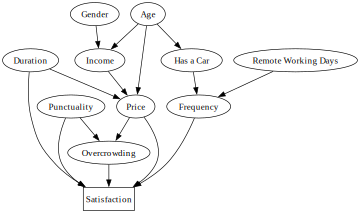

In [5]:
dot

## Pipeline
### Data Simulation

In [6]:
from GenerativeModel import ComplexDependentSatisfaction

In [7]:
# Generation of synthetic data
np.random.seed(1)
gen = ComplexDependentSatisfaction(1000)
data = gen.df
data.head()

,Age,Gender,Income,Remote Working Days,Has Car,Price,Punctuality,Duration,Frequency,Overcrowding,Satisfaction
0,76,M,285000,4,no,3,4,3,4,5,1
1,54,M,322000,2,no,2,5,4,2,4,1
2,21,F,332100,1,yes,1,1,2,2,4,0
3,22,M,100000,3,no,3,4,2,2,5,1
4,27,F,277160,0,yes,1,3,2,1,1,0


### Data preprocessing

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [9]:
X = data.copy().drop(['Satisfaction'], axis=1)
y = data['Satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

### Simple pipepline

In [10]:
from sklearn.pipeline import Pipeline

In [11]:
numeric_features = [ "Age", "Income", "Remote Working Days",
                    "Price", "Punctuality", "Duration", "Frequency",
                    "Overcrowding"]
numeric_transformer = Pipeline(
    steps=[("scaler", MinMaxScaler())]
)

categorical_features = ["Has Car", "Gender"]
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder())
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

In [16]:
def my_pipeline(model, preprocessor):
    clf = Pipeline(
    steps=[("preprocessor", preprocessor), 
           ("classifier", model)]
    )
    clf.fit(X_train, y_train)
    return clf.score(X_test, y_test)

In [17]:
score_random_forest = my_pipeline(RandomForestClassifier(), preprocessor)
score_logistic = my_pipeline(LogisticRegression(), preprocessor)
score_perceptron = my_pipeline(Perceptron(), preprocessor)

print(f"Accuracy score for Random Forest Classifier: {score_random_forest:.4f}")
print(f"Accuracy score for Logistic Regression: {score_logistic:.4f}")
print(f"Accuracy score for Single Layer Perceptron: {score_perceptron:.4f}")

Accuracy score for Random Forest Classifier: 0.9606
Accuracy score for Logistic Regression: 0.9788
Accuracy score for Single Layer Perceptron: 0.9636


### Feature selection

In [18]:
from GenerativeModel import ComplexDependentSatisfaction

In [19]:
# Generation of synthetic data
np.random.seed(1)
gen = ComplexDependentSatisfaction(1000)
data = gen.df
data.head()

,Age,Gender,Income,Remote Working Days,Has Car,Price,Punctuality,Duration,Frequency,Overcrowding,Satisfaction
0,76,M,285000,4,no,3,4,3,4,5,1
1,54,M,322000,2,no,2,5,4,2,4,1
2,21,F,332100,1,yes,1,1,2,2,4,0
3,22,M,100000,3,no,3,4,2,2,5,1
4,27,F,277160,0,yes,1,3,2,1,1,0


In [20]:
data['Gender'] = data['Gender'].map({'M': 1, 'F': 0})
data['Has Car'] = data['Has Car'].map({'yes': 1, 'no': 0})
data.head()

,Age,Gender,Income,Remote Working Days,Has Car,Price,Punctuality,Duration,Frequency,Overcrowding,Satisfaction
0,76,1,285000,4,0,3,4,3,4,5,1
1,54,1,322000,2,0,2,5,4,2,4,1
2,21,0,332100,1,1,1,1,2,2,4,0
3,22,1,100000,3,0,3,4,2,2,5,1
4,27,0,277160,0,1,1,3,2,1,1,0


In [21]:
# Filter method
correlations = data.corr()['Satisfaction'].abs().sort_values(ascending=False)
print('correlation:',correlations)

correlation: Satisfaction           1.000000
Overcrowding           0.435196
Price                  0.418901
Punctuality            0.346210
Duration               0.174066
Frequency              0.075954
Income                 0.041293
Has Car                0.029084
Gender                 0.021831
Remote Working Days    0.015452
Age                    0.012124
Name: Satisfaction, dtype: float64


In [23]:
# RFE
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Define the model using linear regression
model = LinearRegression()

# Define RFE with the model and specify the number of features to select
rfe = RFE(model, n_features_to_select=5)

# Separate features and target variable
X = data.drop(columns=['Satisfaction'])
y = data['Satisfaction']

# Fit RFE to the data
rfe.fit(X, y)

# Get the ranking of features
feature_ranking = pd.DataFrame({
    'feature': X.columns,
    'rank': rfe.ranking_
}).sort_values(by='rank')

print(feature_ranking)

               feature  rank
4              Has Car     1
5                Price     1
6          Punctuality     1
8            Frequency     1
9         Overcrowding     1
1               Gender     2
7             Duration     3
3  Remote Working Days     4
0                  Age     5
2               Income     6


In [24]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
importances = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False)

print(importances)

               feature  importance
9         Overcrowding    0.290781
5                Price    0.266465
6          Punctuality    0.194545
2               Income    0.070598
0                  Age    0.062256
7             Duration    0.032294
3  Remote Working Days    0.029493
8            Frequency    0.028590
1               Gender    0.012825
4              Has Car    0.012152


In [26]:
# comparing the different models

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model without feature selection
model_all_features = LogisticRegression(max_iter=200)
model_all_features.fit(X_train, y_train)
predictions_all = model_all_features.predict(X_test)
accuracy_all = accuracy_score(y_test, predictions_all)
print(f'Accuracy without feature selection: {accuracy_all:.2f}')

# Model with selected features (top 5 from RFE)
selected_features = feature_ranking[feature_ranking['rank'] == 1]['feature']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

model_selected_features = LogisticRegression(max_iter=200)
model_selected_features.fit(X_train_selected, y_train)
predictions_selected = model_selected_features.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, predictions_selected)

print(f'Accuracy with feature selection (RFE): {accuracy_selected:.2f}')

# Model with selected features (correleted filter > 0.4)
X_train_selected = X_train.loc[:,["Price", "Overcrowding"]]
X_test_selected = X_test.loc[:,["Price", "Overcrowding"]]

model_selected_features = LogisticRegression(max_iter=200)
model_selected_features.fit(X_train_selected, y_train)
predictions_selected = model_selected_features.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, predictions_selected)

print(f'Accuracy with feature selection (Filter): {accuracy_selected:.2f}')

# Model with selected features (Random Forest)
selected_features = importances[importances['importance'] > 0.1]['feature']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

model_selected_features = LogisticRegression(max_iter=200)
model_selected_features.fit(X_train_selected, y_train)
predictions_selected = model_selected_features.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, predictions_selected)

print(f'Accuracy with feature selection (Random Forest): {accuracy_selected:.2f}')

Accuracy without feature selection: 0.77
Accuracy with feature selection (RFE): 0.98
Accuracy with feature selection (Filter): 0.83
Accuracy with feature selection (Random Forest): 0.98


/Users/borito/.pyenv/versions/3.10.7/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
accuracies = np.zeros(X.shape[1])
for i in range (1, X.shape[1] + 1): 
    model = LinearRegression()
    rfe = RFE(model, n_features_to_select=i)
    rfe.fit(X, y)

    # Get the ranking of features
    feature_ranking = pd.DataFrame({
        'feature': X.columns,
        'rank': rfe.ranking_
    }).sort_values(by='rank')
    # top i from RFE
    selected_features = feature_ranking[feature_ranking['rank'] == 1]['feature']
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    
    model_selected_features = LogisticRegression(max_iter=200)
    model_selected_features.fit(X_train_selected, y_train)
    predictions_selected = model_selected_features.predict(X_test_selected)
    accuracies[i - 1] = accuracy_score(y_test, predictions_selected)

/Users/borito/.pyenv/versions/3.10.7/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


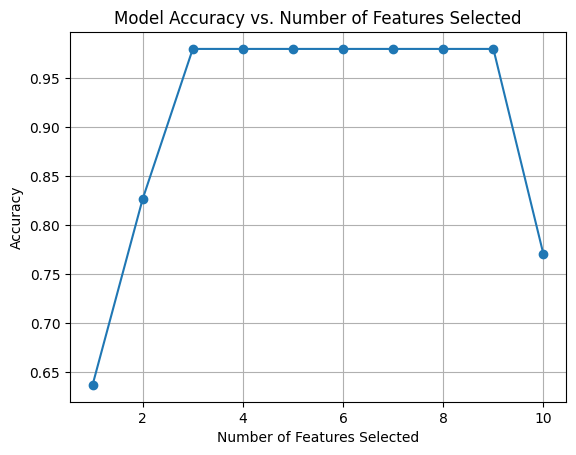

In [28]:
# Plot accuracy vs. number of features
plt.plot(np.arange(1, X.shape[1] + 1), accuracies, marker='o')
plt.xlabel("Number of Features Selected")
plt.ylabel("Accuracy")
plt.title("Model Accuracy vs. Number of Features Selected")
plt.grid()
plt.show()

In [29]:
i = np.argmax(accuracies)
print(f"Max accuracy is {accuracies[i]}, with {i + 1} features selected !")

Max accuracy is 0.98, with 3 features selected !


In [ ]:
# Exact values from user-provided results
features = ["noise_1", "noise_2", "noise_3", "noise_4", "noise_5", "price", "punctuality", "duration", "frequency", "overcrowding"]

# Correlation-Based Importance
correlation_importance = [0.006054, 0.021606, 0.006088, 0.038890, 0.004496, 0.519185, 0.269080, 0.065455, 0.028504, 0.465135]

# RFE-Based Importance (inverse of rank for better visualization)
rfe_ranking = [7, 6, 9, 8, 10, 1, 2, 3, 4, 5]  # Rankings from RFE
rfe_importance = [1 / rank if rank != 0 else 0 for rank in rfe_ranking]

# Random Forest-Based Importance
random_forest_importance = [0.037449, 0.034916, 0.037431, 0.03365, 0.041367, 0.319403, 0.124820, 0.036293, 0.035772, 0.298895]

# DataFrame
importance_df = pd.DataFrame({
    'Feature': features,
    'Correlation-Based': correlation_importance,
    'RFE': rfe_importance,
    'Random Forest': random_forest_importance
})

# Bar plots for feature importance changes
importance_df.set_index('Feature').plot(kind='bar', figsize=(14, 8))
plt.title("Feature Importance Across Selection Methods (User-Provided Values)")
plt.ylabel("Importance")
plt.xlabel("Features")
plt.xticks(rotation=45)
plt.legend(title="Method")
plt.tight_layout()
plt.show()